# 如何在Titanic Kaggle Challenge中获得0.8134分

由 Kaggle 主持的[泰坦尼克号生存挑战赛](https://www.kaggle.com/c/titanic/)是一项竞赛，其目标是基于一组描述乘客的变量，例如他的年龄，性别或乘客在船上的等级，来预测特定乘客是生存或死亡。

我一直在玩 Titanic 数据集，我最近在公共排行榜上获得了0.8134的准确度分数。当我写这篇文章时，我在所有 Kagglers 中排名前4％。

这篇文章将分享我的解决方案。

为了使本教程更具“学术性”以便任何人都能从中受益，我将首先从探索性数据分析（EDA）开始，然后我将遵循特征工程并最终呈现我设置的预测模型。

在这个 jupyter 笔记本中，我将在每个级别的管道中使用 Python。

本教程涉及的主要库是：

* **Pandas** 用于数据操作和接入（ingestion）
* **Matplotlib** 和 **seaborn** 用于数据可视化
* **Numpy** 用于多维数组计算
* **sklearn** 用于机器学习和预测建模

### 安装过程

安装这些软件包的一种非常简单的方法是下载并安装 [Conda](href="http://conda.pydata.org/docs/install/quick.html#os-x-miniconda-install)，它是将以上所有包封装起来的发行版。此发行版适用于所有平台（Windows，Linux 和 Mac OSX）。

### 特别注意

这是我作为博主和机器学习从业者的第一次尝试。

如果您对我所做的代码或假设有疑问，请不要犹豫，在下面的评论部分发表评论。

如果您对如何改进笔记本电脑也有建议，请联系我。

本教程可在我的 [github](https://github.com/ahmedbesbes/How-to-score-0.8134-in-Titanic-Kaggle-Challenge) 帐户中找到。

> 译者注：本翻译在 [qiwihui](https://github.com/qiwihui/How-to-score-0.8134-in-Titanic-Kaggle-Challenge) 下。

希望你已经在计算机上设置了所有内容。让我们开始吧。

## I - 探索性数据分析

正如在不同的数据项目中，我们将首先开始深入研究数据并建立我们的第一个直觉。

在本节中，我们将做四件事。

 - 数据提取：我们将加载数据集并首先查看它。
 - 清洁：我们将填写缺失值。
 - 绘图：我们将创建一些有趣的图表，这些图表（希望）可以发现数据中的相关性和隐藏的见解。
 - 假设：我们将从图表中提出假设。

我们稍微调整了这款笔记本的风格，以便画图居中。

In [4]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

导入有用的包。

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

有两个数据集：训练集和测试集。
我们将使用训练集来构建我们的预测模型，用测试集来对其进行评分并生成输出文件以在Kaggle评估系统上提交。

我们将在本文末尾看到这个过程是如何完成的。

现在让我们开始加载训练集。

In [2]:
data = pd.read_csv('./data/train.csv')

In [3]:
print data.shape

(891, 12)


我们得到:

- 891 行
- 12 列

Pandas 允许你鸟瞰数据。

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


`Survived` 列是 **目标变量**。 如果 `Survived` 为 1，乘客幸免于难，否则他已经死了。这是我们要预测的变量。

其他变量描述了乘客。 它们是 **特征**。

 - `PassengerId`：船上每位旅客的身份证明
 - `Pclass`：乘客等级。 它有三个可能的值：1，2，3（第一，第二和第三类）
 - `Name`：Passeger的名字
 - `Sex`：性别
 - `Age`：年龄
 - `SibSp`：与乘客一起旅行的兄弟姐妹和配偶的数量
 - `Parch`：与乘客一起旅行的父母和孩子的数量
 - `Ticket`：船票号码
 - `Fare`：票价
 - `Cabin`：船舱号码
 - `Embarked`：这描述了人们登上的泰坦尼克号的三个可能区域。 三个可能的值 S，C，Q

Pandas 允许您对数字特征进行高级简单的统计描述。
这可以使用 `describe` 方法完成。

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


`count` 变量显示 `Age` 列中缺少177个值。

一种解决方案是用中值年龄填充空值。我们也可以用平均年龄来估算，但中位数对异常值更为稳健。

In [7]:
data['Age'] = data['Age'].fillna(data['Age'].median())

让我们看一下结果。

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


完美。

我们现在制作一些图表。让我们根据性别来看待生存。

In [9]:
data['Died'] = 1 - data['Survived']

/usr/local/miniconda3/envs/Sharly/lib/python2.7/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


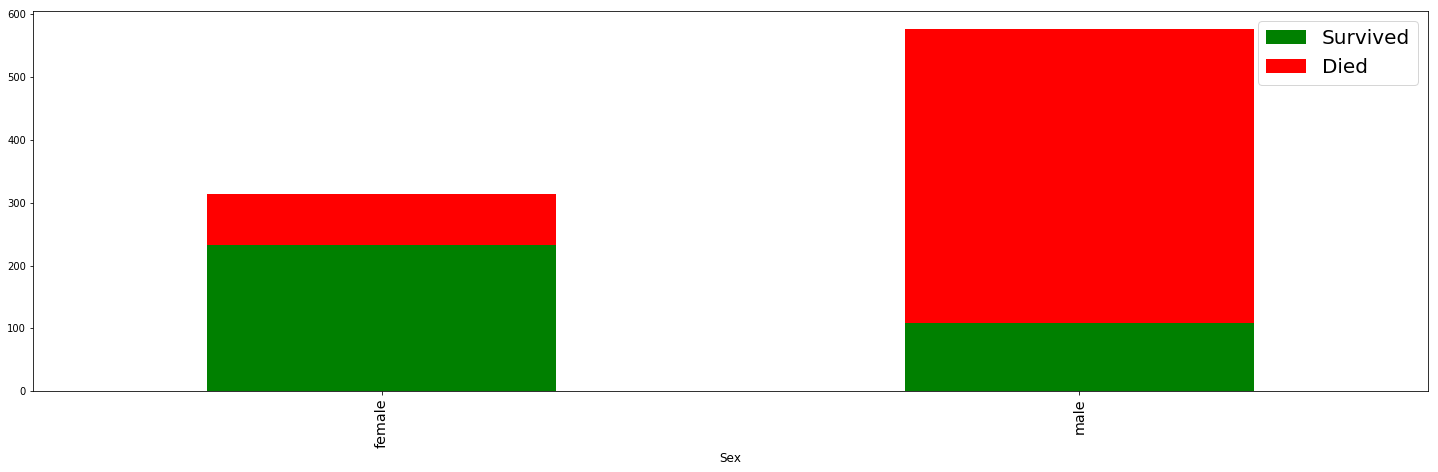

In [10]:
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7),
                                                          stacked=True, colors=['g', 'r']);

看起来男性乘客更容易死亡。让我们绘制相同的图形，但用比例代替。

/usr/local/miniconda3/envs/Sharly/lib/python2.7/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


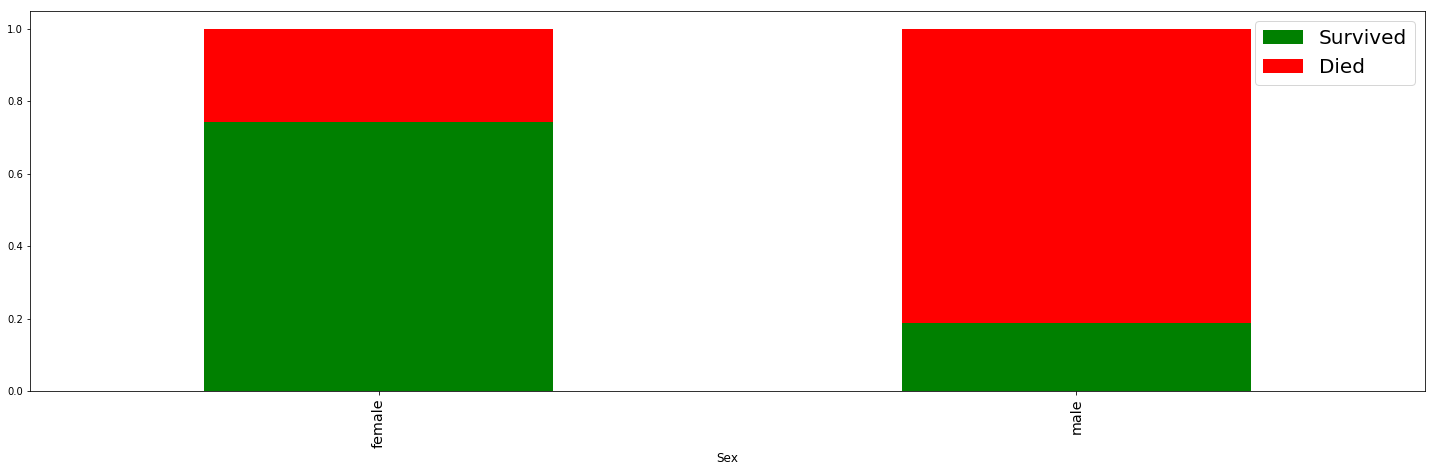

In [11]:
data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True, colors=['g', 'r']);

性别变量似乎是一种歧视性特征。女性更有可能生存。

现在让我们将生存与年龄变量联系起来。

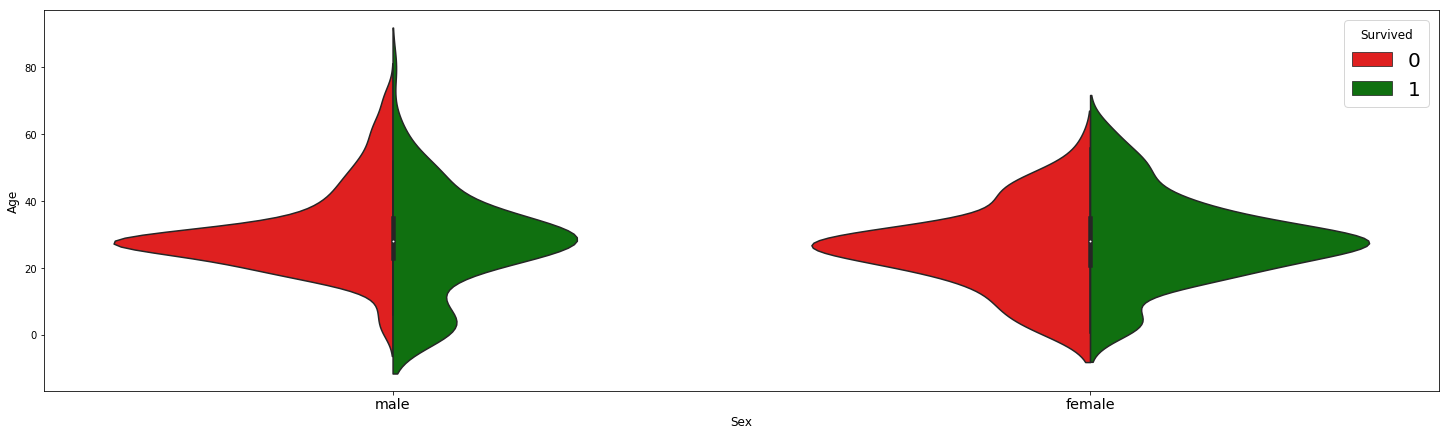

In [12]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=data, 
               split=True,
               palette={0: "r", 1: "g"}
              );

正如我们在上面的图表中看到并通过以下方式验证：

 - 女性的生存率高于男性，如较大的女性绿色直方图所示

现在，我们看到：
 - 年龄为男性乘客的生存：
      - 年轻的男性倾向于生存
      - 20至40岁之间的大量乘客死亡
    
 - 年龄似乎没有对女性生存产生直接影响

以下小提琴情节证实，在遇到威胁的情况下，水手和船长遵守一条旧的行为准则：“**妇女和儿童优先！**”。

![energy](./images/article_1/titanic.jpg)

对吗？

现在让我们关注每位乘客的票价，看看它如何影响生存。

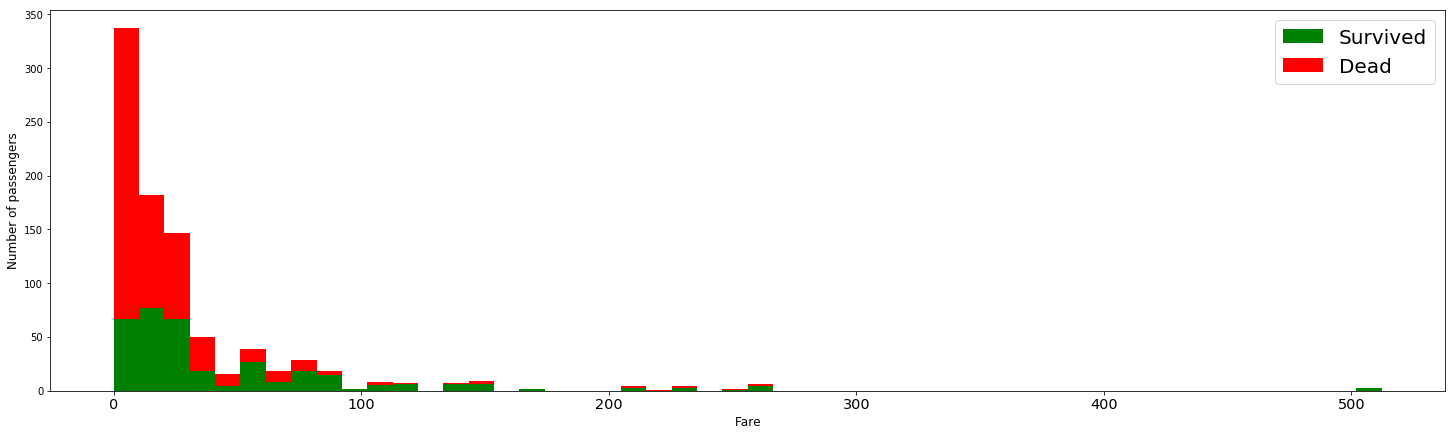

In [13]:
figure = plt.figure(figsize=(25, 7))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

票价较低的乘客更容易死亡。
换句话说，拥有更昂贵门票，因此更重要的社会地位的乘客似乎首先获救。

好的，这很好。 现在让我们将年龄，票价和生存结合在一张图表上。

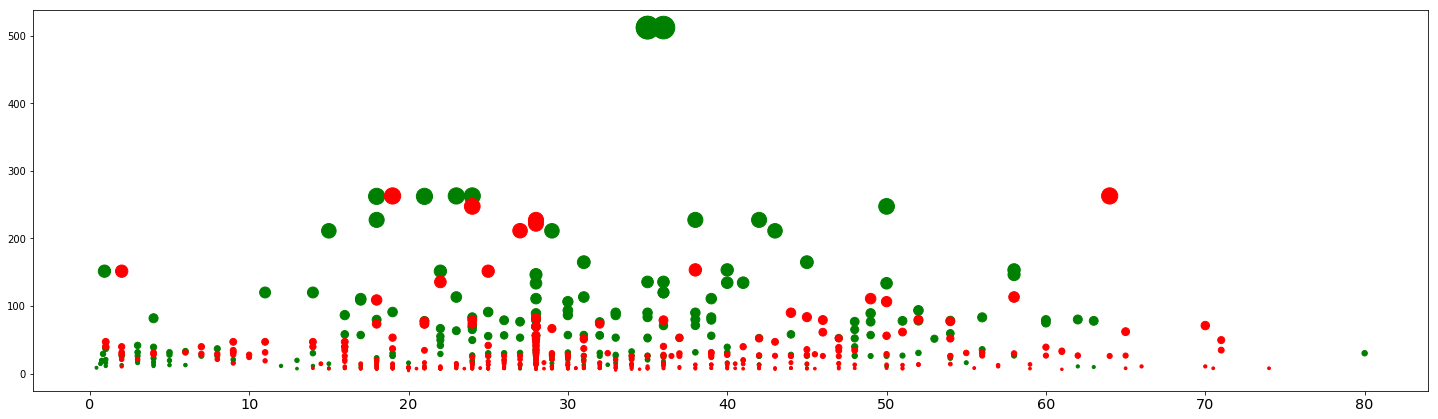

In [14]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(data[data['Survived'] == 1]['Age'], data[data['Survived'] == 1]['Fare'], 
           c='green', s=data[data['Survived'] == 1]['Fare'])
ax.scatter(data[data['Survived'] == 0]['Age'], data[data['Survived'] == 0]['Fare'], 
           c='red', s=data[data['Survived'] == 0]['Fare']);

圆圈的大小与票价成正比。

在 x 轴上，我们有年龄，在 y 轴，我们考虑票价。

我们可以观察不同的集群：

1. x = 20 和 x = 45 之间的大绿点：票价最高的成人
2. x = 10 和 x = 45 之间的小红点，船上较低级别的成年人
3. x = 0 和 x = 7 之间的小密集点：这些是被保存的孩子

事实上，票价与我们在下面的图表中看到的类别相关。

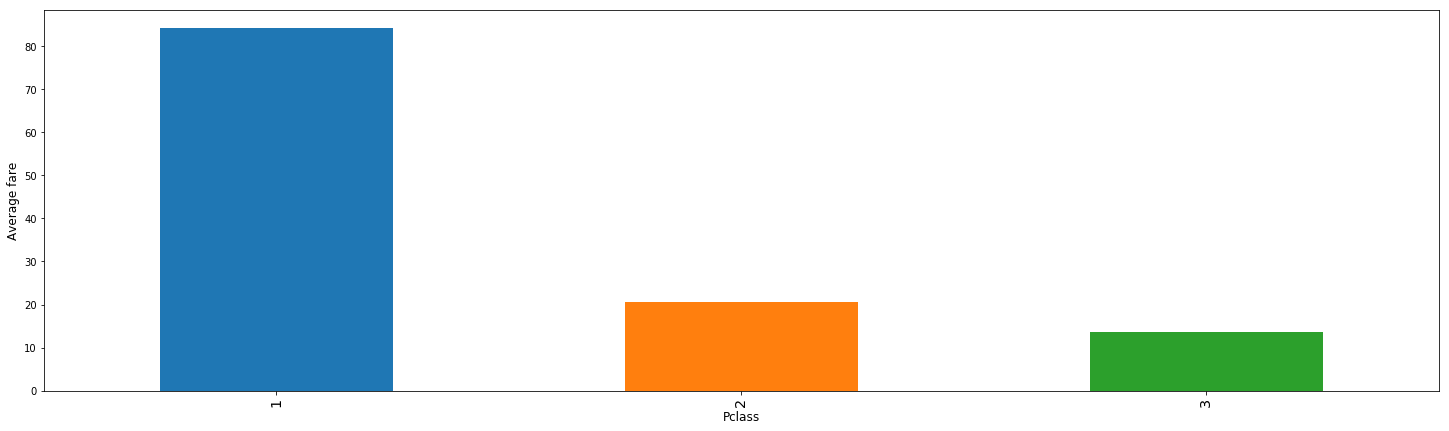

In [15]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25, 7), ax = ax);

现在让我们看看登船地点如何影响生存。

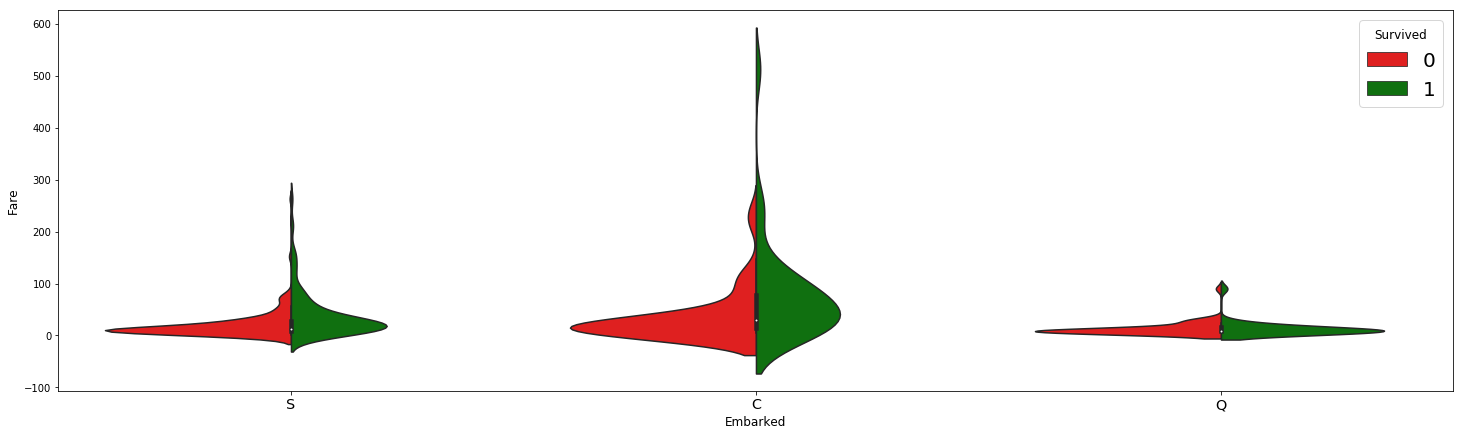

In [16]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=data, split=True, palette={0: "r", 1: "g"});

It seems that the embarkation C have a wider range of fare tickets and therefore the passengers who pay the highest prices are those who survive.

We also see this happening in embarkation S and less in embarkation Q.

Let's now stop with data exploration and switch to the next part.

似乎登船地点 C 的票价范围更广，因此支付最高价格的乘客是那些幸存的乘客。

我们也看到这种情况发生在登船地点 S 而不是登船地点 Q。

现在让我们停止数据探索并切换到下一部分。

## II - 特征工程

在前一部分中，我们调查了数据并发现了一些有趣的相关性。

在这一部分中，我们将看到如何处理和转换这些变量，使数据变得可以通过机器学习算法进行管理。

我们还将创建或“设计”在构建模型时有用的其他功能。

我们将在此过程中看到如何处理文本变量（如乘客姓名）并将此信息集成到我们的模型中。

为了更加清晰，我们将代码分散在单独的函数中。

但首先，让我们定义一个打印函数，断言是否已经处理了一个特征。

In [25]:
def status(feature):
    print 'Processing', feature, ': ok'

### 加载数据

启动机器学习问题的一个技巧是将训练集一起附加到测试集。

我们将使用训练集进行特征工程以防止信息泄漏。然后我们将这些变量添加到测试集中。

让我们加载训练集和测试集并将它们合在一起。

In [17]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('./data/train.csv')
    
    # reading test data
    test = pd.read_csv('./data/test.csv')

    # extracting and then removing the targets from the training data 
    targets = train.Survived
    train.drop(['Survived'], 1, inplace=True)
    

    # merging train data and test data for future feature engineering
    # we'll also remove the PassengerID since this is not an informative feature
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return combined

In [18]:
combined = get_combined_data()

让我们看一下数据的维度。

In [19]:
print combined.shape

(1309, 10)


训练集和测试集被合并。您可能会注意到总行数（1309）是训练集和测试集中行数的精确总和。

In [20]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 提取乘客称谓

在查看乘客姓名时，人们可能想知道如何处理它们以提取有用的信息。

如果你仔细看看这些第一个例子：

- Braund, **Mr.** Owen Harris	
- Heikkinen, **Miss.** Laina
- Oliva y Ocana, **Dona.** Fermina
- Peter, **Master.** Michael J

你会注意到每个名字都有一个称谓！这可能是一个简单的小姐（Miss.）或太太（Mrs.），但它有时可能像 Master，Sir 或 Dona 那样更复杂。在这种情况下，我们可以通过简单地解析称谓并提取标题并转换为二进制变量来引入有关社会地位的其他信息。

让我们看看我们将如何在下面的函数中执行此操作。

让我们先来看看在训练集中有什么不同的称谓。

In [21]:
titles = set()
for name in data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [22]:
print titles

set(['Sir', 'Major', 'the Countess', 'Don', 'Mlle', 'Capt', 'Dr', 'Lady', 'Rev', 'Mrs', 'Jonkheer', 'Master', 'Ms', 'Mr', 'Mme', 'Miss', 'Col'])


In [23]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # we extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

This function parses the names and extract the titles. Then, it maps the titles to categories of titles. 
We selected : 

此函数解析名称并提取称谓。 然后，它将称谓映射到称谓类别。
我们选择：

- Officer
- Royalty 
- Mr
- Mrs
- Miss
- Master

让我们运行一下！

In [26]:
combined = get_titles()

Processing Title : ok


In [27]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


让我们检查一下称谓是否填写正确。

In [28]:
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


There is indeed a NaN value in the line 1305. In fact the corresponding name is Oliva y Ocana, **Dona**. Fermina.

This title was not encoutered in the train dataset.

在1305行中确实存在 NaN 值。实际上相应的名称是 `Oliva y Ocana, **Dona**. Fermina`。

在训练数据集中没有遇到这个标题。

很好，现在我们有一个名为 **Title** 的附加列来包含这些信息。

### 处理年龄（Age）

我们在第一部分中看到 `Age` 变量缺少177个值。这是一个很大的数字（约占数据集的13％）。简单地用平均年龄或中位年龄替换它们可能不是最佳解决方案，因为年龄可能因乘客的类别和类别而不同。

为了理解原因，让我们按性别（Sex），称谓（Title）和乘客类（Pclass）对我们的数据集进行分组，并为每个子集计算中位数年龄。

为了避免测试集中的数据泄漏，我们使用训练集填写训练中的缺失年龄，并且我们使用从训练集计算的值来填充测试集中的年龄。

训练级中缺少的年龄数

In [29]:
print combined.iloc[:891].Age.isnull().sum()

177


测试集中缺少的年龄数

In [30]:
print combined.iloc[891:].Age.isnull().sum()

86


In [31]:
grouped_train = combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

In [32]:
grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


此 dataframe 将帮助我们根据不同的标准估算缺失的年龄值。

查看中位年龄列，看看这个值如何根据 `Sex`，`Pclass` 和 `Title` 组合在一起。

例如：

 - 如果乘客是女性，则来自 Pclass 1 和来自王室（royalty），中位年龄为40.5岁。
 - 如果乘客是男性，来自 Pclass 3，拥有 Mr 称谓，则年龄中位数为26岁。

让我们创建一个函数，根据这些不同的属性填充 **组合** 中的缺失年龄。

In [33]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    return grouped_median_train[condition]['Age'].values[0]


def process_age():
    global combined
    # a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined

In [34]:
combined = process_age()

Processing age : ok


完美。失踪的年龄已被取代。

但是，我们注意到票价（Fare）中缺少1个值，登船位置（Embarked）有两个缺失值，而船舱位置（Cabin）有很多缺失值。我们稍后会处理这些变量。

我们现在处理名字。

In [35]:
def process_names():
    global combined
    # we clean the Name variable
    combined.drop('Name', axis=1, inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    # removing the title variable
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')
    return combined

此函数会删除 `Name` 列，我们不再使用它，因为我们创建了 `Title` 列。

然后我们使用虚拟编码（dummy encoding）对称谓值进行编码。

您可以了解虚拟编码以及如何在 [Pandas](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) 中轻松完成此操作。

In [36]:
combined = process_names()

Processing names : ok


In [37]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


如你看到的 ：
 - 不再有名字特征。
 - 出现了新的变量（Title_X）。这些特征是二进制的。
      - 例如，如果 Title_Mr = 1，则相应的称谓为 Mr。

### 处理票价（Fare）

让我们通过在训练集上计算的平均票价估算缺失的票价值。

In [38]:
def process_fares():
    global combined
    # there's one missing fare value - replacing it with the mean.
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('fare')
    return combined

此函数用平均值替换一个缺失的票价（Fare）值。

In [39]:
combined = process_fares()

Processing fare : ok


### 处理登船位置（Embarked）

In [40]:
def process_embarked():
    global combined
    # two missing embarked values - filling them with the most frequent one in the train  set(S)
    combined.Embarked.fillna('S', inplace=True)
    # dummy encoding 
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combined

此函数用最常用的 `Embarked` 值替换了两个缺失的 `Embarked` 值。

In [41]:
combined = process_embarked()

Processing embarked : ok


In [42]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


### 处理船舱位置（Cabin）

In [43]:
train_cabin, test_cabin = set(), set()

for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')

In [44]:
print train_cabin

set(['A', 'C', 'B', 'E', 'D', 'G', 'F', 'U', 'T'])


In [45]:
print test_cabin

set(['A', 'C', 'B', 'E', 'D', 'G', 'F', 'U'])


我们在测试集中没有任何不存在于训练集中的船舱位置字母。

In [46]:
def process_cabin():
    global combined    
    # replacing missing cabins with U (for Uknown)
    combined.Cabin.fillna('U', inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')    
    combined = pd.concat([combined, cabin_dummies], axis=1)

    combined.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combined

此函数将 `NaN` 值替换为 U（表示 _Unknow_ ）。 然后它将每个 `Cabin` 值映射到第一个字母。
然后它再次使用虚拟编码对舱位值进行编码。

In [47]:
combined = process_cabin()

Processing cabin : ok


好了，没有缺失值了。

In [48]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### 处理性别（Sex）

In [50]:
def process_sex():
    global combined
    # mapping string values to numerical one 
    combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})
    status('Sex')
    return combined

此函数将字符串值 `male` 和 `female` 分别映射到1和0。

In [51]:
combined = process_sex()

Processing Sex : ok


### 处理乘客等级（Pclass）

In [52]:
def process_pclass():
    
    global combined
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    
    # adding dummy variable
    combined = pd.concat([combined, pclass_dummies],axis=1)
    
    # removing "Pclass"
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('Pclass')
    return combined

此函数使用虚拟编码对 Pclass（1,2,3）的值进行编码。

In [53]:
combined = process_pclass()

Processing Pclass : ok


### 处理船票号码（Ticket）

让我们首先看看我们的数据集中不同的船票号码前缀

In [54]:
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

In [55]:
tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

In [56]:
print len(tickets)

37


In [57]:
def process_ticket():
    
    global combined
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = filter(lambda t : not t.isdigit(), ticket)
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)

    status('Ticket')
    return combined

In [58]:
combined = process_ticket()

Processing Ticket : ok


### 处理家庭

这部分包括根据家庭的大小创建新变量（大小是我们创建的另一个变量）。

这种新变量的创建是在一个现实的假设下完成的：大家庭聚集在一起，因此他们比单独旅行的人更有可能获救。

In [59]:
def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status('family')
    return combined

此函数引入了4个新特征：

 -  `FamilySize`：包括乘客（他/她）自己在内的亲属总数。
 -  `Sigleton`：描述 size = 1 的家庭的布尔变量
 -  `SmallFamily`：一个布尔变量，描述 2 <= size <= 4 的家庭
 -  `LargeFamily`：一个布尔变量，描述 5 <size 的家庭

In [60]:
combined = process_family()

Processing family : ok


In [61]:
print combined.shape

(1309, 67)


最后我们得到了67个特征。

In [62]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


## III - 模型

在这一部分中，我们根据我们创建的特征建立统计模型。您可以将此模型视为一个盒子，它可以处理任何新乘客的信息，并决定他是否能够幸存。

有各种各样的模型可供使用，从逻辑回归到决策树，以及更复杂的模型，如随机森林和梯度提升树。

我们将使用随机森林。Random Froests 在 Kaggle 比赛中证明了很高的有效性。

有关为什么集合方法表现良好的更多详细信息，您可以参考这些帖子：

 -  http://mlwave.com/kaggle-ensembling-guide/
 -  http://www.overkillanalytics.net/more-is-always-better-the-power-of-simple-ensembles/

回到我们的问题，我们现在必须：

1.将组合数据集分成训练集和测试集。
2.使用训练集建立预测模型。
3.使用训练集评估模型。
4.使用测试集测试模型，并生成并输出提交文件。

请记住，我们必须重复 2 和 3 直到达到可接受的评估分数。

让我们首先导入需要用到的函数包。

In [63]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

为了评估我们的模型，我们将使用5折交叉验证（5-fold cross validation），因为它是在比赛排行榜中使用的指标。

为此，我们将定义一个小的评分函数。

In [64]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

从组合数据集中恢复训练集和测试集是一项简单的任务。

In [65]:
def recover_train_test_target():
    global combined
    
    targets = pd.read_csv('./data/train.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train, test, targets

In [66]:
train, test, targets = recover_train_test_target()

### 特征选择

到目前为止，我们已经提出了30多个特征。这个数字非常大。

在完成特征工程时，我们通常倾向于通过选择捕获基本特征的“正确”数量的特征来减少维度。

事实上，特征选择带来许多好处：

 - 它减少了数据之间的冗余
 - 它加快了训练过程
 - 它减少过拟合

基于树的估算器可用于计算特征重要性，而这些重要性又可用于丢弃不相关的特征。

In [67]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

让我们看看每个特征的重要性。

In [68]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

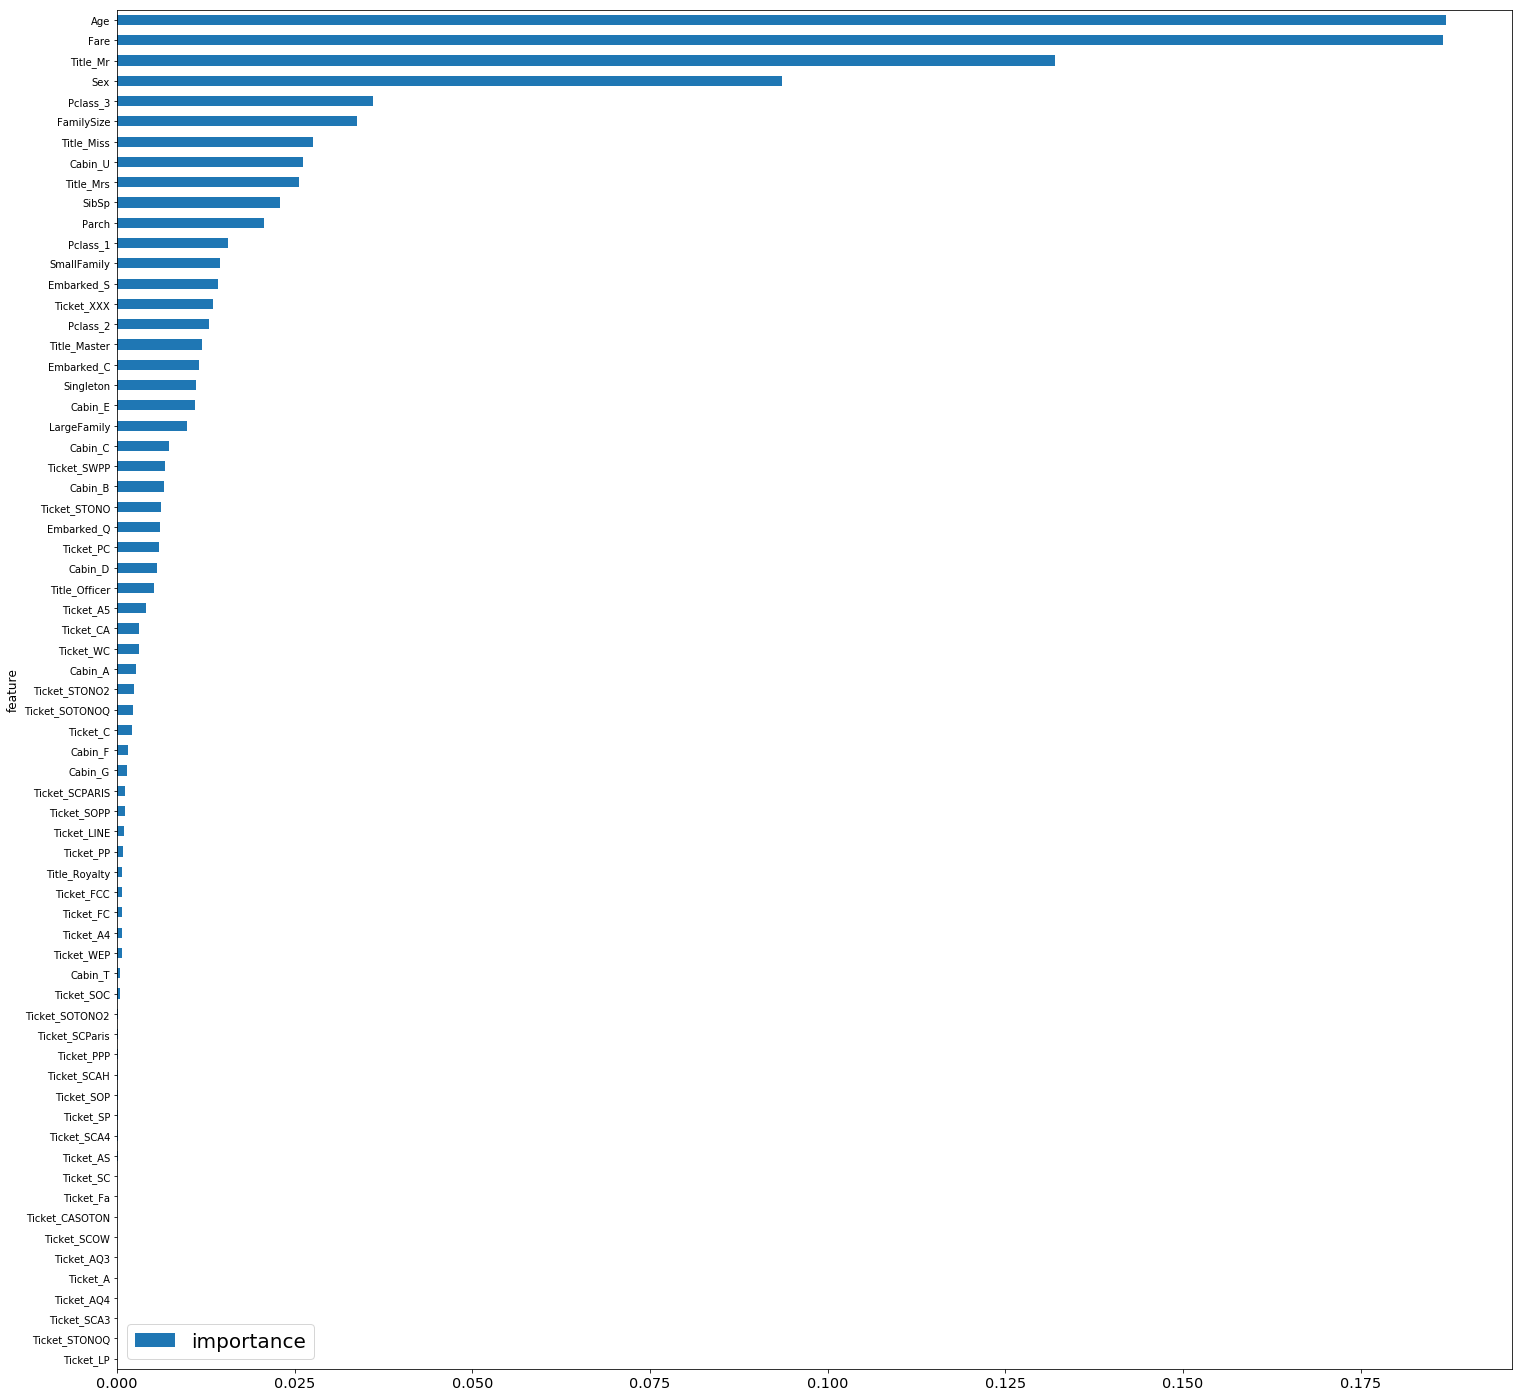

In [69]:
features.plot(kind='barh', figsize=(25, 25))

正如您可能注意到的那样，与 `Title_Mr`，`Age`，`Fare` 和 `Sex` 相关联非常重要。

与 `Passenger_Id` 也有重要的相关性。

现在让我们将我们的训练集和测试集转换为更紧凑的数据集。

In [70]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print train_reduced.shape

(891, 12)


In [71]:
test_reduced = model.transform(test)
print test_reduced.shape

(418, 12)


好极了！ 现在我们的特征减少了很多。

我们将看看我们是否会使用训练集的减少版或完整版。

### 让我们尝试不同的基础模型

In [72]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

In [73]:
for model in models:
    print 'Cross-validation of : {0}'.format(model.__class__)
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print 'CV score = {0}'.format(score)
    print '****'

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.818195097715
****
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
CV score = 0.81818240172
****
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.808183171282
****
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.824917697684
****


### 超参数调整

正如建模部分的开头所提到的，我们将使用随机森林模型。它可能不是这项任务的最佳模型，但我们将展示如何调整。这项工作可以应用于不同的模型。

随机森林非常方便。然而，它们会带有一些参数进行调整，以便为预测任务获得最佳模型。

要了解有关随机森林的更多信息，请参阅此 [链接](https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/)。

此外，我们将使用全部训练集。

In [74]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

现在通过扫描超参数的几个组合来构建模型，我们可以生成一个输出文件以在 Kaggle 上提交。

In [76]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('./data/test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('./predictions/gridsearch_rf.csv', index=False)

### [BONUS]  Blending different models

我没有亲自上传基于模型混合的提交，但这是你可以这么做：

In [77]:
trained_models = []
for model in models:
    model.fit(train, targets)
    trained_models.append(model)

predictions = []
for model in trained_models:
    predictions.append(model.predict_proba(test)[:, 1])

predictions_df = pd.DataFrame(predictions).T
predictions_df['out'] = predictions_df.mean(axis=1)
predictions_df['PassengerId'] = aux['PassengerId']
predictions_df['out'] = predictions_df['out'].map(lambda s: 1 if s >= 0.5 else 0)

predictions_df = predictions_df[['PassengerId', 'out']]
predictions_df.columns = ['PassengerId', 'Survived']

In [78]:
predictions_df.to_csv('./predictions/blending_base_models.csv', index=False)

为了获得良好的混合提交，基本模型应该是不同的，并且它们的相关性是不相关的。

## IV - 结论

在本文中，我们探讨了 [Kaggle](http://kaggle.com) 带给我们的一个有趣的数据集。

我们浏览了数据科学管道的基本要点：

 - 数据探索和可视化：制定假设的第一步
 - 数据清理
 - 特征工程
 - 特征选择
 - 超参数调整
 - 提交
 - 混合

如果您想测试和使用它，可以将此博客下载为笔记本：[我的 github repo](https://github.com/ahmedbesbes/How-to-score-0.8134-in-Titanic-Kaggle-Challenge/raw/master/article_1.ipynb)

> 译者注：此中文翻译地址为： [qiwihui 的 github repo](https://github.com/qiwihui/How-to-score-0.8134-in-Titanic-Kaggle-Challenge/raw/master/article_cn.ipynb)

关于这一挑战的文章很多，所以显然还有改进的余地。

以下是我建议的后续步骤：

 - 挖掘更多数据并最终构建新特征。
 - 尝试不同的模型：逻辑回归，Gradient Boosted Tree，XGboost 等。
 - 尝试集成学习技巧（堆叠）
 - 运行 auto-ML 框架

如果你能找到改善我的解决方案的方法，我会非常高兴。这可以让我更新文章，绝对给你信任。所以请随时发表评论。